# Gaussians

We know that Gaussian equations contain two main parameters: 
* a mean, $\mu$, and
* a variance, often written as its square value, $\sigma^2$.

The general Gaussian equation looks like this:

> $p(x) = \frac{1}{{ \sqrt {2\pi \sigma ^2 } }}e^{{ - ( {x - \mu } )^2 }/{2\sigma ^2 }}$


Where we'll call the first part of the equation the *coefficient* and the second part the *exponential*. This second part is most important in defining the shape of the Gaussian (the coefficient is a normalizing term).

For uncertain, continuous quantities, such as the estimated location of a self-driving car, **we use Gaussians to represent uncertainty** in that quantity. The smaller the variance, the more certain we are about a quantity.

In [1]:
%matplotlib inline

# import math functions
from math import *
import matplotlib.pyplot as plt
import numpy as np

# gaussian function
def f(mu, sigma2, x):
    ''' f takes in a mean and squared variance, and an input x
       and returns the gaussian value.'''
    coefficient = 1.0 / sqrt(2.0 * pi *sigma2)
    exponential = exp(-0.5 * (x-mu) ** 2 / sigma2)
    return coefficient * exponential
 

In [3]:
# an example Gaussian
gauss_1 = f(10, 4, 10)
print(gauss_1)

0.19947114020071635


### Plotting a Gaussian

Since our function only returns values for specific values of x, we can plot a Gaussian by looping through a range of x values and creating a resulting list of Gaussian values, `g`, as shown below. You're encouraged to see what happens if you change the values of `mu` and `sigma2`.

In [8]:
%matplotlib inline

def plot(mu, sigma2): 
    # define a range of x values
    x_axis = np.arange(0, 30, 0.1)

    # create a corresponding list of gaussian values
    g = []
    for x in x_axis:
        g.append(f(mu, sigma2, x))

    # plot the result 
    plt.plot(x_axis, g)

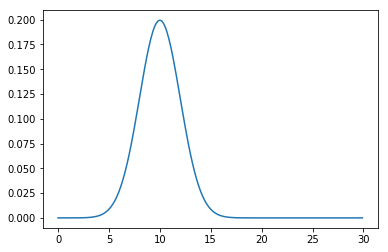

In [9]:
plot(10, 4)

Look at the plot above and take note of the value of the peak. This is the **maximum** value of the Gaussian and we can calculate it exactly by setting `x = mu`.

In [10]:
# maximize a Gaussian by setting mu and x equal
gauss_2 = f(10, 4, 10)
print(gauss_2)

0.19947114020071635


# New Mean and Variance

Now let's take the formulas from the example below and use them to write a program that takes in two means and variances, and returns a *new*, updated mean and variance for a gaussian. This step is called the parameter or **measurement update** because it is the update that happens when an initial belief (represented by the blue Gaussian, below) is merged with a new piece of information, a measurement with some uncertainty (the orange Gaussian). 

As you've seen in the previous quizzes, the updated Gaussian will be a combination of these two Gaussians with a new mean that is in between both of theirs and a variance that is less than the smallest of the two given variances; this means that after a measurement, our new mean is more certain than that of the initial belief!
<img src='images/mean_var.png' width="50%" height="50%">

### Write an `update` function that performs the measurement update.

This function should combine the given Gaussian parameters and return new values for the mean and squared variance.

This function does not have to perform any exponential math, it simply has to follow the equations for the measurement update as seen in the image at the top of this notebook. You may assume that the given variances `var1` and `var2` are squared terms.

In [11]:
# the update function
def update(mean1, var1, mean2, var2):
    ''' This function takes in two means and two squared variance terms,
        and returns updated gaussian parameters.'''
    ## Calculate the new parameters
    new_mean = (var1*mean2 + var2*mean1) / (var1 + var2)
    new_var = 1 / (1/var1 + 1/var2)
    
    return [new_mean, new_var]

In [12]:
# test your implementation
mu_prime, var_prime = update(10, 4, 12, 4)
print(mu_prime, var_prime)

11.0 2.0


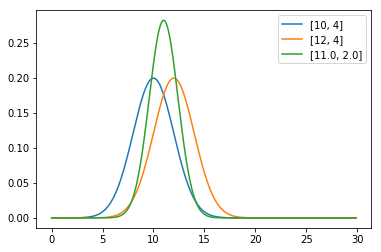

In [13]:
params = [[10, 4], [12, 4], [mu_prime, var_prime]]
for param in params:
    plot(param[0], param[1])
    
plt.legend(params)

# Predict Function

After performing a parameter update, which is done after some new measurement is collected, the next step is to incorporate motion into our Gaussian calculations. Recall that, as we estimate the location of a robot or self-driving car:
* the measurement update *increases* our estimation certainty
* the motion update/prediction *decreases* our certainty

That is because every motion has some chance of under or overshooting its goal, and since motion is not exact, we end up losing some certainty about our exact location after each motion.

Let's take the formulas from the example below and use them to write a program that takes in a mean and a motion and squared variances for both of those quantities, and returns a *new*, updated mean and variance for a new gaussian. This step is called the **motion update** or the predict step.

<img src='images/motion_update.png' width="50%" height="50%">



In [14]:
# the motion update/predict function
def predict(mean1, var1, mean2, var2):
    ''' This function takes in two means and two squared variance terms,
        and returns updated gaussian parameters, after motion.'''
    ## Calculate the new parameters
    new_mean = mean1 + mean2
    new_var = var1 + var2
    
    return [new_mean, new_var]

In [15]:
# test your implementation
new_mu, new_sigma = predict(10, 4, 12, 4)
print(new_mu, new_sigma)

22 8


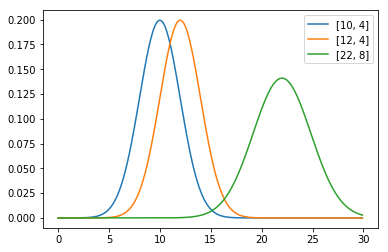

In [16]:
params = [[10, 4], [12, 4], [new_mu, new_sigma]]
for param in params:
    plot(param[0], param[1])
    
plt.legend(params)

# 1D Kalman Filter

Now, you're ready to implement a 1D Kalman Filter by putting all these steps together. Let's take the case of a robot that moves through the world. As a robot moves through the world it locates itself by performing a cycle of:
1. sensing and performing a measurement update and
2. moving and performing a motion update

You've programmed each of these steps individually, so now let's combine them in a cycle!

After implementing this filter, you should see that you can go from a very uncertain location Gaussian to a more and more certain Gaussian, as pictured below. The code in this notebooks is really just a simplified version of the Kalman filter that runs in the Google self-driving car that is used to track surrounding vehicles and other objects.

<img src='images/gaussian_updates.png' height=70% width=70% />

---

### For the given measurements and motions, write complete 1D Kalman filter code that loops through all of these in order.

Your complete code should look at sensor measurements then motions in that sequence until all updates are done!

### Initial Uncertainty

You'll see that you are given initial parameters below, and this includes and nitial location estimation, `mu` and squared variance, `sig`. Note that the initial estimate is set to the location 0, and the variance is extremely large; this is a state of high confusion much like the *uniform* distribution we used in the histogram filter. There are also values given for the squared variance associated with the sensor measurements and the motion, since neither of those readings are perfect, either.

You should see that even though the initial estimate for location (the initial `mu`) is far from the first measurement, it should catch up fairly quickly as you cycle through measurements and motions.

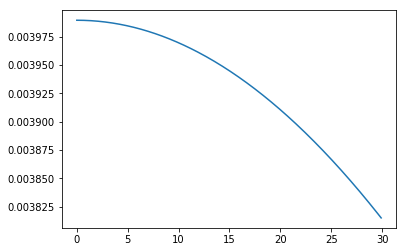

update 4.998000799680128 3.9984006397441023
predict 5.998000799680128 5.998400639744102


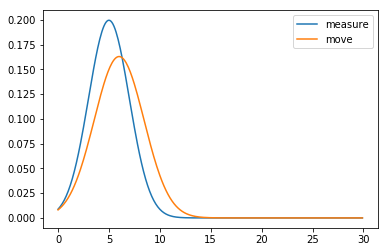

update 5.999200191953932 2.399744061425258
predict 6.999200191953932 4.399744061425258


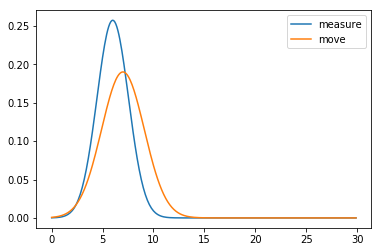

update 6.999619127420922 2.0951800575117594
predict 8.999619127420921 4.09518005751176


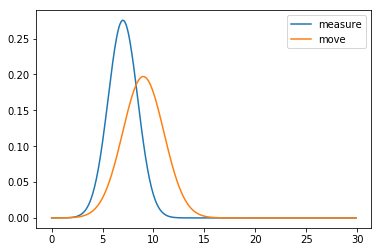

update 8.999811802788143 2.0235152416216957
predict 9.999811802788143 4.023515241621696


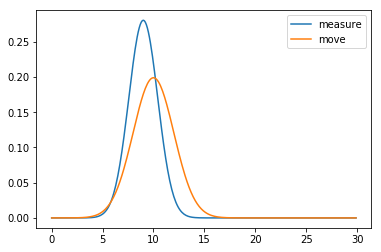

update 9.999906177177365 2.0058615808441944
predict 10.999906177177365 4.005861580844194


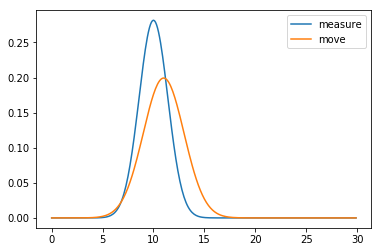

In [34]:
# measurements for mu and motions, U
measurements = [5., 6., 7., 9., 10.]
motions = [1., 1., 2., 1., 1.]

# initial parameters
measurement_sig = 4.
motion_sig = 2.
mu = 0.
sig = 10000.

# plot initial state
plot(mu, sig)
plt.show()

## Loop through all measurements/motions
## Print out and display the resulting Gaussian 
for i in range(len(measurements)):
    mu, sig = update(mu, sig, measurements[i], measurement_sig)
    print('update', mu, sig)
    plot(mu, sig)
    mu, sig = predict(mu, sig, motions[i], motion_sig)
    print('predict', mu, sig)
    plot(mu, sig)
    plt.legend(['measure', 'move'])
    plt.show()